## Predicting the real value of Airbnb rooms

[Aleksey Bilogur](https://www.kaggle.com/residentmario) has already done EDA in [this kernal](https://www.kaggle.com/residentmario/d/airbnb/boston/exploring-prices) and [this](https://www.kaggle.com/residentmario/d/airbnb/boston/modeling-prices).

## Load and clean data

In [1]:
%matplotlib inline  

import pandas as pd
import json
import numpy as np

features = ["accommodates", "bathrooms", "bedrooms", "beds"]
df = pd.read_csv("listings.csv")
for f in features:
    df = df[pd.notnull(df[f])]


y = df["price"].map(lambda p: float(p[1:].replace(",", "")))
x = df[["latitude", "longitude", "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds"]]

In [2]:
x.head()

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds
0,42.282619,-71.133068,House,Entire home/apt,4,1.5,2.0,3.0
1,42.286241,-71.134374,Apartment,Private room,2,1.0,1.0,1.0
2,42.292438,-71.135765,Apartment,Private room,2,1.0,1.0,1.0
3,42.281106,-71.121021,House,Private room,4,1.0,1.0,2.0
4,42.284512,-71.136258,House,Private room,2,1.5,1.0,2.0


In [3]:
# http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/
cols_to_transform = ["property_type", "room_type"]
x = pd.get_dummies(x, columns = cols_to_transform)
x.convert_objects(convert_numeric=True).fillna(0)


x.head()

/home/shujian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,latitude,longitude,accommodates,bathrooms,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,...,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,42.282619,-71.133068,4,1.5,2.0,3.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,42.286241,-71.134374,2,1.0,1.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,42.292438,-71.135765,2,1.0,1.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,42.281106,-71.121021,4,1.0,1.0,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,42.284512,-71.136258,2,1.5,1.0,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [4]:
x.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,...,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,...,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000
mean,42.340056,-71.084846,3.049199,1.222519,1.256958,1.612033,0.728704,0.010964,0.003374,0.000281,...,0.001125,0.000281,0.156311,0.010964,0.004779,0.015181,0.001687,0.594040,0.383750,0.022210
std,0.024443,0.031650,1.782176,0.502280,0.754652,1.013492,0.444691,0.104150,0.057993,0.016767,...,0.033520,0.016767,0.363201,0.104150,0.068977,0.122291,0.041042,0.491146,0.486367,0.147386
min,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.329995,-71.105300,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.345230,-71.078429,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,42.354788,-71.062130,4.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Combine regressors from Sklearn

/home/shujian/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


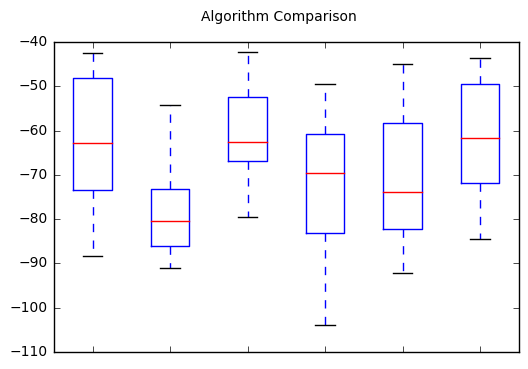

In [5]:
# http://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

# prepare configuration for cross validation test harness
seed = 2017

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DecTree', DecisionTreeRegressor()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVR()))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Use half dataset to predict the other with KNN

In [6]:
from sklearn.model_selection import train_test_split

n = len(x) / 2 
clf = KNeighborsRegressor()
clf.fit(x[:n], y[:n])
pred1 = clf.predict(x[n:])

clf.fit(x[n:], y[n:])
pred2 = clf.predict(x[:n])

pred = np.concatenate([pred2, pred1])

In [7]:
from sklearn.metrics import mean_absolute_error
print('The MAE of predicted value by KNN: ', mean_absolute_error(y, pred))

('The MAE of predicted value by KNN: ', 66.561034579701996)


In [8]:
result = pd.concat([df["id"], pd.DataFrame(pred, columns=['pred'])], axis=1, join_axes=[df.index])
result.to_csv("pred_price.csv")
result.head()

,id,pred
0,12147973,173.0
1,3075044,65.4
2,6976,76.0
3,1436513,104.8
4,7651065,84.0
